In [1]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud, STOPWORDS
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
df = pd.read_csv("reddit_data.csv")
df

,Unnamed: 0,author,date_time,language,number_of_likes,number_of_shares,Unnamed: 5,Comment,Hateful
0,0,ArianaGrande,12/1/2017 19:52,en,7900,3472,NaN,Damn I thought they had strict gun laws in Ger...,0
1,1,ArianaGrande,11/1/2017 8:38,en,3689,1380,NaN,I dont care about what it stands for or anythi...,0
2,2,ArianaGrande,11/1/2017 2:52,en,10341,2387,NaN,It's not a group it's an idea lol,0
3,3,ArianaGrande,11/1/2017 2:44,en,10774,2458,NaN,So it's not just America!,0
4,4,ArianaGrande,10/1/2017 5:22,en,17620,4655,NaN,The dog is a spectacular dancer considering he...,0
...,...,...,...,...,...,...,...,...,...
995,995,justinbieber,22/05/2015 01:59,en,10027,4883,NaN,don't believe a word that comes out of the bla...,1
996,996,justinbieber,21/05/2015 07:23,en,21406,13763,NaN,This is actually big brain,0
997,997,justinbieber,20/05/2015 05:54,en,32907,13127,NaN,We used to spend time together in the wiggingr...,0
998,998,justinbieber,14/05/2015 19:07,en,11675,6071,NaN,Anyone else uncomfortable by the name of the p...,0


/var/folders/7t/32qtgmnn6s3639w7jpcztt980000gn/T/ipykernel_9940/4290214473.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


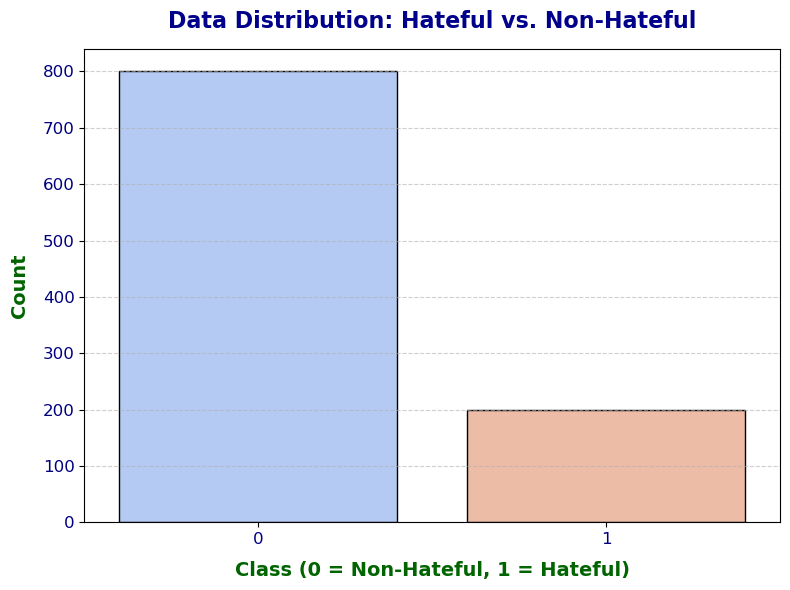

In [3]:
class_distribution = df['Hateful'].value_counts()

plt.figure(figsize=(8, 6))

# Bar chart for class distribution
sns.barplot(
    x=class_distribution.index, 
    y=class_distribution.values, 
    palette='coolwarm', 
    edgecolor='black'
)

plt.title('Data Distribution: Hateful vs. Non-Hateful', fontsize=16, fontweight='bold', color='darkblue', pad=15)

plt.xlabel('Class (0 = Non-Hateful, 1 = Hateful)', fontsize=14, fontweight='semibold', color='darkgreen', labelpad=10)

plt.ylabel('Count', fontsize=14, fontweight='semibold', color='darkgreen', labelpad=10)

plt.xticks(fontsize=12, color='navy')
plt.yticks(fontsize=12, color='navy')

plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()

plt.show()


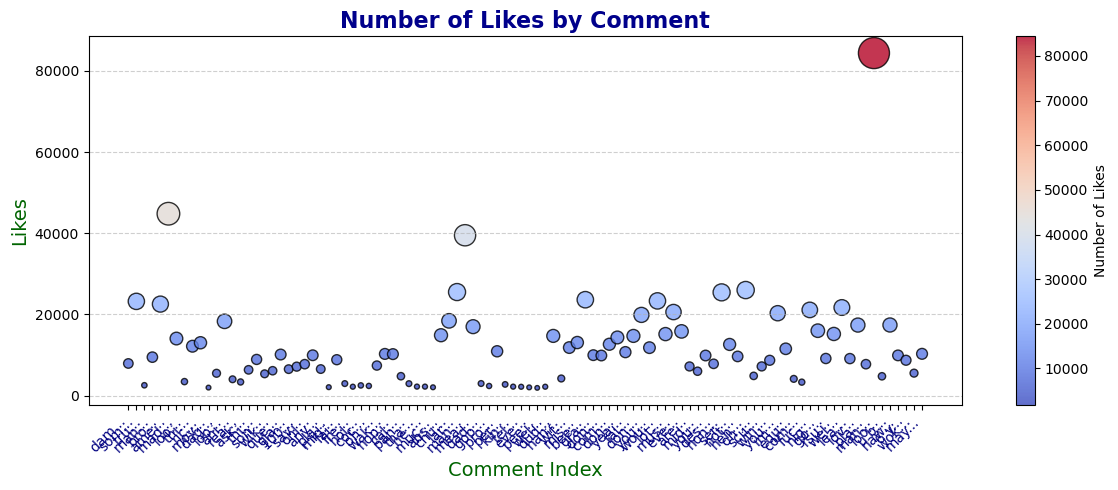

In [44]:
plt.figure(figsize=(12, 5))

# Downsample the data to display every 10th point
downsampled_df = df.iloc[::10]

bubble_size = downsampled_df['number_of_likes'] / downsampled_df['number_of_likes'].max() * 500

plt.scatter(downsampled_df.index, downsampled_df['number_of_likes'], s=bubble_size, c=downsampled_df['number_of_likes'], cmap='coolwarm', alpha=0.8, edgecolor='black')
plt.colorbar(label='Number of Likes')

plt.title('Number of Likes by Comment', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Comment Index', fontsize=14, color='darkgreen')
plt.ylabel('Likes', fontsize=14, color='darkgreen')
plt.xticks(downsampled_df.index, downsampled_df['Comment'].str[:3] + '...', rotation=45, ha='right', fontsize=10, color='navy')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [5]:

print ( df.isnull() )

     Unnamed: 0  author  date_time  language  number_of_likes  \
0         False   False      False     False            False   
1         False   False      False     False            False   
2         False   False      False     False            False   
3         False   False      False     False            False   
4         False   False      False     False            False   
..          ...     ...        ...       ...              ...   
995       False   False      False     False            False   
996       False   False      False     False            False   
997       False   False      False     False            False   
998       False   False      False     False            False   
999       False   False      False     False            False   

     number_of_shares  Unnamed: 5  Comment  Hateful  
0               False        True    False    False  
1               False        True    False    False  
2               False        True    False    False  
3  

In [6]:
df. isnull(). sum()
df.dropna

<bound method DataFrame.dropna of      Unnamed: 0        author         date_time language  number_of_likes  \
0             0  ArianaGrande   12/1/2017 19:52       en             7900   
1             1  ArianaGrande    11/1/2017 8:38       en             3689   
2             2  ArianaGrande    11/1/2017 2:52       en            10341   
3             3  ArianaGrande    11/1/2017 2:44       en            10774   
4             4  ArianaGrande    10/1/2017 5:22       en            17620   
..          ...           ...               ...      ...              ...   
995         995  justinbieber  22/05/2015 01:59       en            10027   
996         996  justinbieber  21/05/2015 07:23       en            21406   
997         997  justinbieber  20/05/2015 05:54       en            32907   
998         998  justinbieber  14/05/2015 19:07       en            11675   
999         999  justinbieber  14/05/2015 09:02       en            10799   

     number_of_shares  Unnamed: 5  \
0   

In [7]:

df['Comment'] = df['Comment'].str.lower()

punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)
 
df['Comment']= df['Comment'].apply(lambda x: remove_punctuations(x))
df.head()

,Unnamed: 0,author,date_time,language,number_of_likes,number_of_shares,Unnamed: 5,Comment,Hateful
0,0,ArianaGrande,12/1/2017 19:52,en,7900,3472,NaN,damn i thought they had strict gun laws in ger...,0
1,1,ArianaGrande,11/1/2017 8:38,en,3689,1380,NaN,i dont care about what it stands for or anythi...,0
2,2,ArianaGrande,11/1/2017 2:52,en,10341,2387,NaN,its not a group its an idea lol,0
3,3,ArianaGrande,11/1/2017 2:44,en,10774,2458,NaN,so its not just america,0
4,4,ArianaGrande,10/1/2017 5:22,en,17620,4655,NaN,the dog is a spectacular dancer considering he...,0


In [8]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/umar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/umar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/umar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/umar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/umar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/umar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/umar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/umar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    imp_words = []
    
    
    lemmatizer = WordNetLemmatizer()
 
    
    for word in word_tokenize(str(text)):
        if word.lower() not in stop_words:
            lemmatized_word = lemmatizer.lemmatize(word)
            imp_words.append(lemmatized_word)
 
    output = " ".join(imp_words)
    return output


df['Comment'] = df['Comment'].apply(lambda text: remove_stopwords(text))
df.head()

,Unnamed: 0,author,date_time,language,number_of_likes,number_of_shares,Unnamed: 5,Comment,Hateful
0,0,ArianaGrande,12/1/2017 19:52,en,7900,3472,NaN,damn thought strict gun law germany,0
1,1,ArianaGrande,11/1/2017 8:38,en,3689,1380,NaN,dont care stand anything connected like shield,0
2,2,ArianaGrande,11/1/2017 2:52,en,10341,2387,NaN,group idea lol,0
3,3,ArianaGrande,11/1/2017 2:44,en,10774,2458,NaN,america,0
4,4,ArianaGrande,10/1/2017 5:22,en,17620,4655,NaN,dog spectacular dancer considering two left foot,0


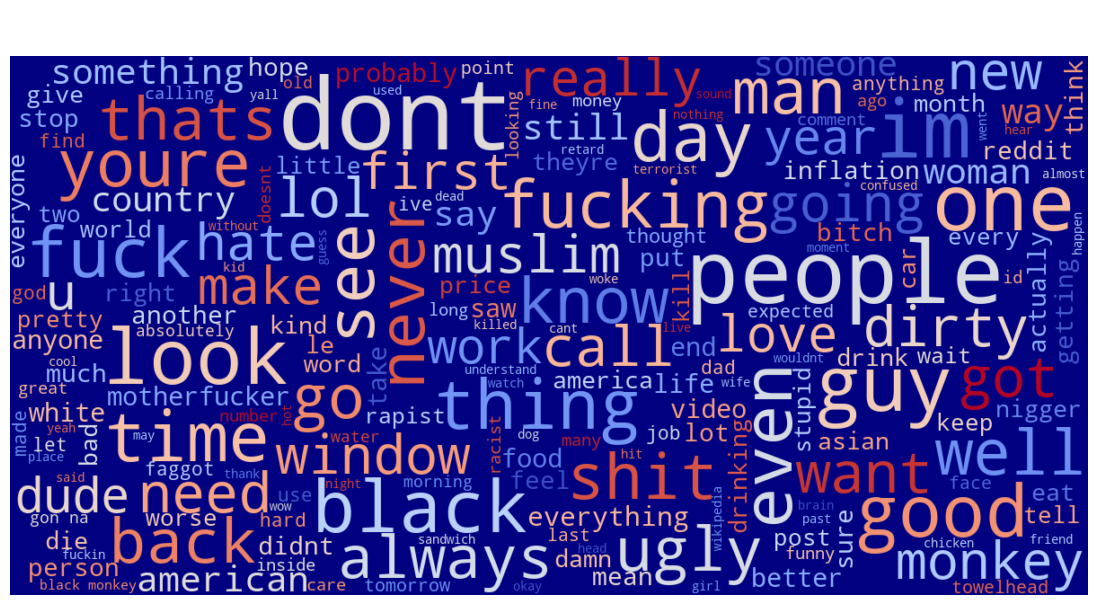

In [11]:

all_comments = ' '.join(df['Comment'])


stopwords = set(STOPWORDS)

# Creating a beautiful word cloud
wordcloud = WordCloud(
    width=1200, 
    height=600, 
    background_color='navy',  
    colormap='coolwarm',      
    stopwords=stopwords,
    max_font_size=110,        
    contour_color='silver',   
    contour_width=1.5         
).generate(all_comments)


plt.figure(figsize=(14, 7))    
plt.imshow(wordcloud, interpolation='bilinear')  
plt.axis('off')                
plt.title('Refined Word Cloud After Stop Words Removal', fontsize=18, color='white', pad=20)  # Add a polished title
plt.show()


In [12]:
X_train, X_test, y_train, y_test = train_test_split(df['Comment'], df['Hateful'], test_size=0.2, random_state=42)
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')  
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [13]:
classifiers = {

    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    
}

In [14]:
import seaborn as sns
accuracy_scores = {}
classification_reports = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}
classifier_names = []
y_preds = []
for clf_name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_tfidf, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test_tfidf)
    
    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    precision_scores[clf_name] = precision_score(y_test, y_pred)
    recall_scores[clf_name] = recall_score(y_test, y_pred)
    f1_scores[clf_name] = f1_score(y_test, y_pred)
    
    # Print results
    print(f'\n{clf_name} Results:')
    print(f'Accuracy: {accuracy:.4f}')
    print('Classification Report:\n', report)
    
    accuracy_scores[clf_name] = accuracy
    classification_reports[clf_name] = report


K-Nearest Neighbors Results:
Accuracy: 0.8850
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       169
           1       0.70      0.45      0.55        31

    accuracy                           0.89       200
   macro avg       0.80      0.71      0.74       200
weighted avg       0.87      0.89      0.87       200


Decision Tree Results:
Accuracy: 0.9250
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       169
           1       0.72      0.84      0.78        31

    accuracy                           0.93       200
   macro avg       0.85      0.89      0.87       200
weighted avg       0.93      0.93      0.93       200


Support Vector Machine Results:
Accuracy: 0.9050
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       169
           1       1.00    

/var/folders/7t/32qtgmnn6s3639w7jpcztt980000gn/T/ipykernel_9940/3976062881.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='Spectral')


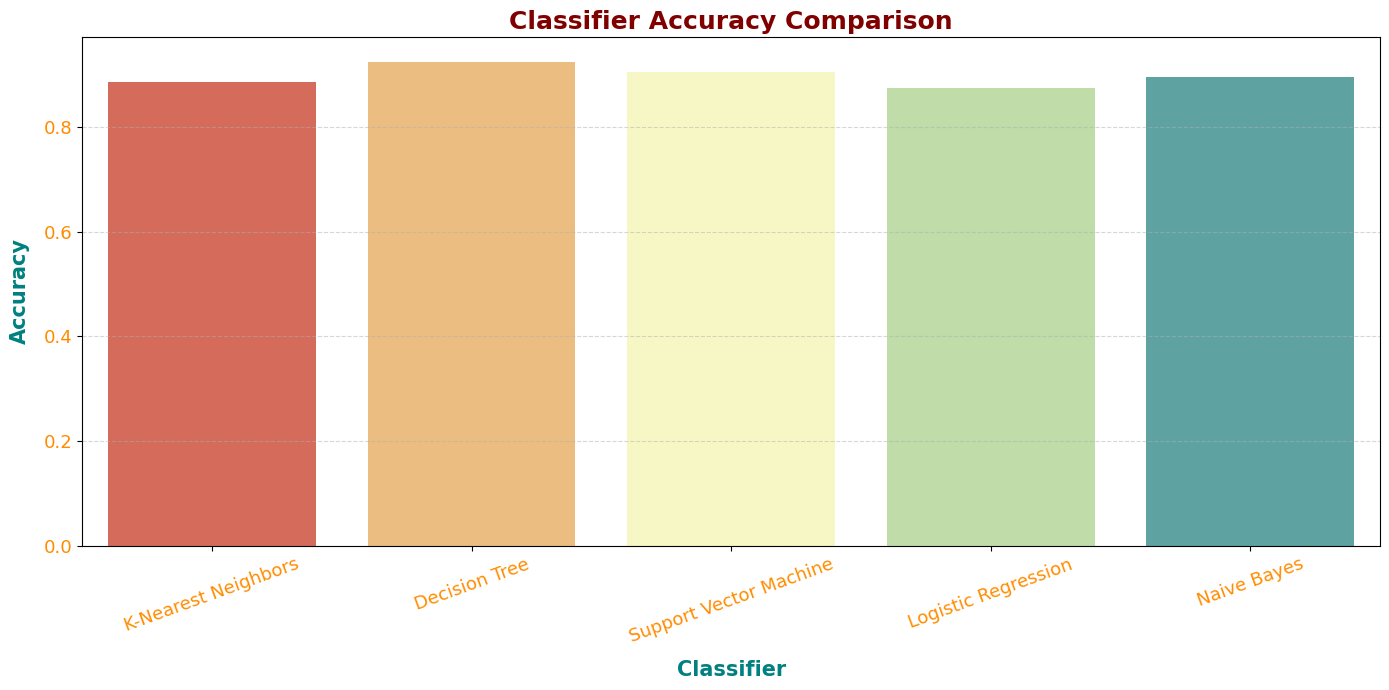

In [15]:
plt.figure(figsize=(14, 7))

sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='Spectral')

plt.title('Classifier Accuracy Comparison', fontsize=18, fontweight='bold', color='maroon')

plt.xlabel('Classifier', fontsize=15, fontweight='semibold', color='teal', labelpad=10)

plt.ylabel('Accuracy', fontsize=15, fontweight='semibold', color='teal', labelpad=10)

plt.xticks(fontsize=13, color='darkorange', rotation=20)

plt.yticks(fontsize=13, color='darkorange')

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()

plt.show()


/var/folders/7t/32qtgmnn6s3639w7jpcztt980000gn/T/ipykernel_9940/801858285.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


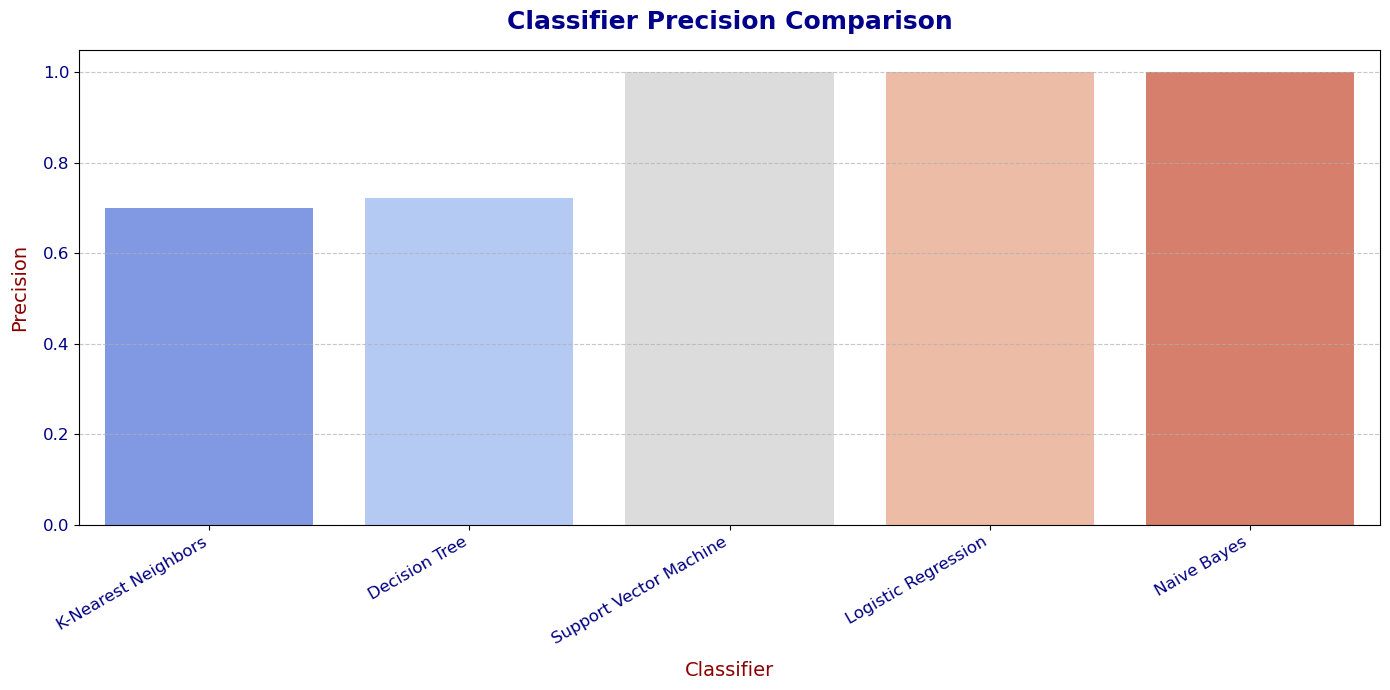

/var/folders/7t/32qtgmnn6s3639w7jpcztt980000gn/T/ipykernel_9940/801858285.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


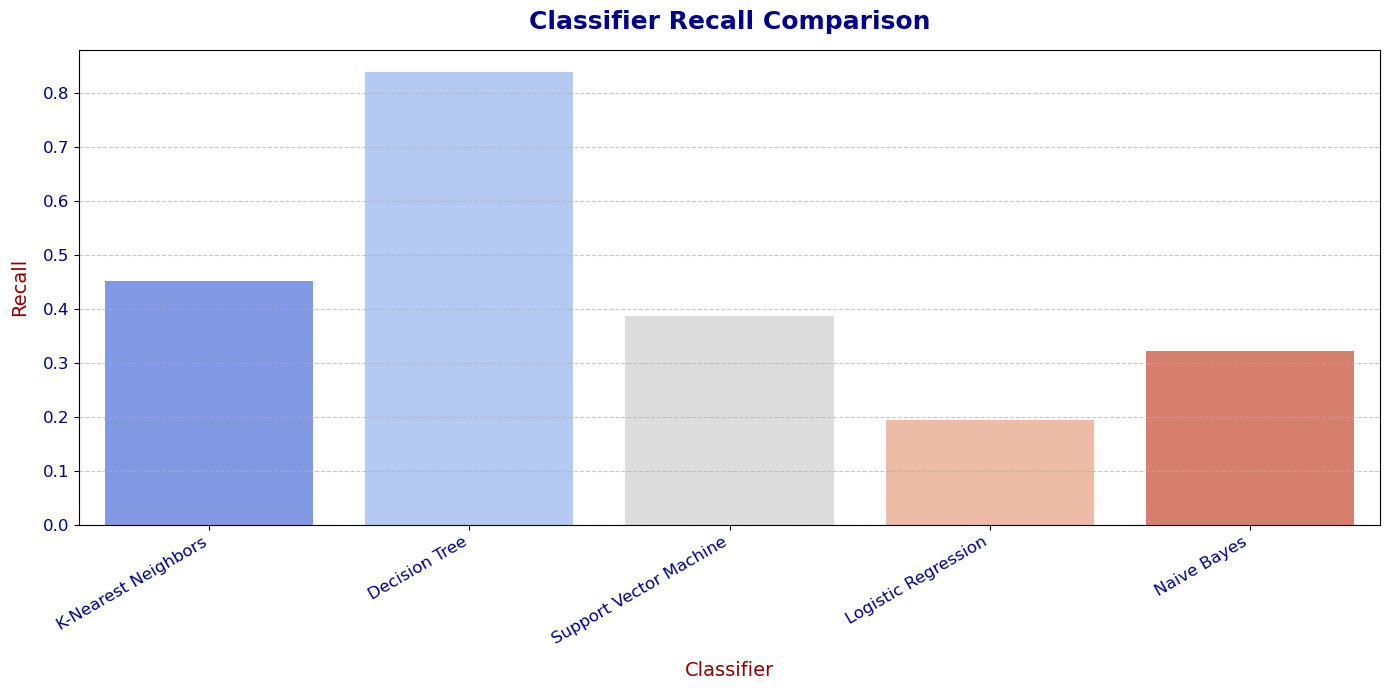

/var/folders/7t/32qtgmnn6s3639w7jpcztt980000gn/T/ipykernel_9940/801858285.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


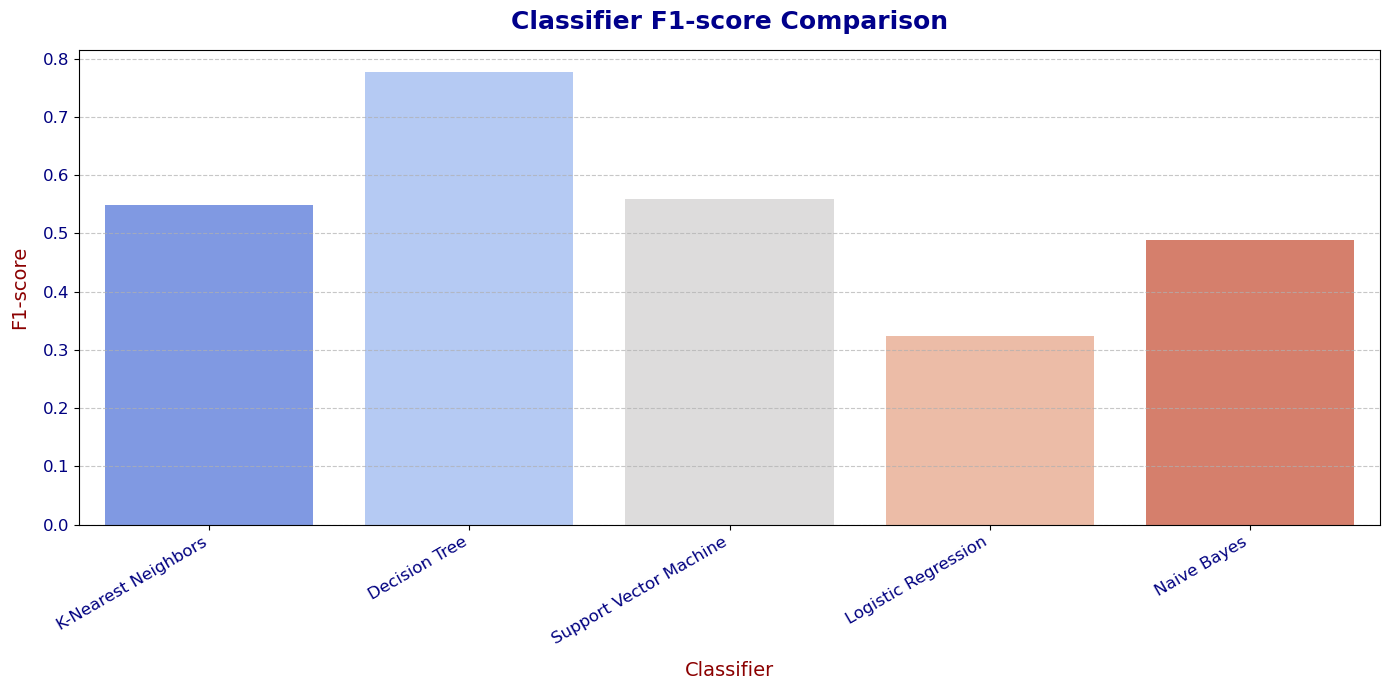

In [16]:
metrics_to_visualize = ['precision', 'recall', 'f1-score']
for metric in metrics_to_visualize:
    plt.figure(figsize=(14, 7))
    sns.barplot(
        x=list(classifiers.keys()), 
        y=[
            precision_scores[name] if metric == 'precision' else
            recall_scores[name] if metric == 'recall' else
            f1_scores[name] for name in classifiers.keys()
        ], 
        palette='coolwarm'
    )
    plt.title(f'Classifier {metric.capitalize()} Comparison', fontsize=18, fontweight='bold', color='darkblue', pad=15)
    plt.xlabel('Classifier', fontsize=14, fontweight='medium', color='darkred', labelpad=10)
    plt.ylabel(metric.capitalize(), fontsize=14, fontweight='medium', color='darkred', labelpad=10)
    plt.xticks(fontsize=12, color='navy', rotation=30, ha='right')
    plt.yticks(fontsize=12, color='navy')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
